In [1]:
import scniche as sn
import scanpy as sc
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Last run with scNiche version:", sn.__version__)

# set seed
sn.pp.set_seed()

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/scniche_v101/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Last run with scNiche version: 1.1.0


[<AxesSubplot: title={'center': 'CellType'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot: title={'center': 'Compartment'}, xlabel='spatial1', ylabel='spatial2'>]

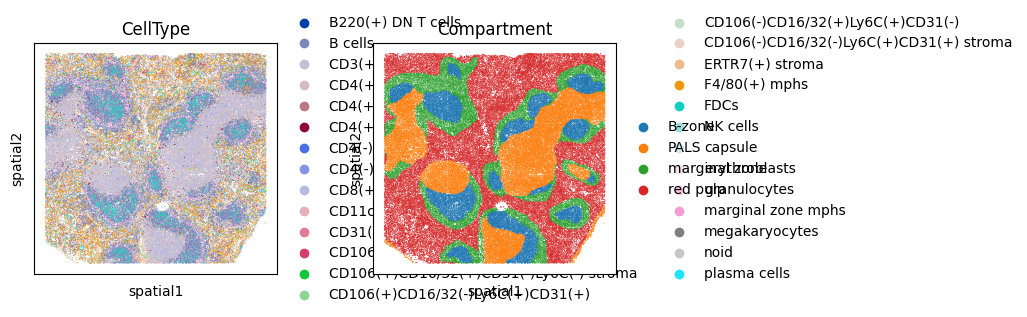

In [2]:
# download data from figshare (https://figshare.com/ndownloader/files/46669087)
# adata = sn.datasets.mouse_spleen_codex()
adata = sc.read('experiment/spleen/data/BALBc-1.h5ad')

plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(adata, basis="spatial", color=['CellType', 'Compartment', ],s=2, show=False, )

In [3]:
k_cutoff = 30
target_num = 4
batch_num = 30
lr = 0.01
epochs = 200

# prepare
sc.pp.scale(adata)
adata = sn.pp.cal_spatial_neighbors(adata=adata, celltype_key='CellType', mode='KNN', k_cutoff=k_cutoff, verbose=False)
adata = sn.pp.cal_spatial_exp(adata=adata, mode='KNN', k_cutoff=k_cutoff, is_pca=False, verbose=False)
adata = sn.pp.prepare_data_batch(adata=adata, verbose=False, batch_num=batch_num)
    
# training
model = sn.tr.Runner_batch(adata=adata, device='cuda:0', verbose=False)
adata = model.fit(lr=lr, epochs=epochs)
        
# clustering
adata = sn.tr.clustering(adata=adata, target_k=target_num)

100%|██████████| 30/30 [00:03<00:00,  8.41it/s]


Applying K-Means Clustering with 4 target cluster numbers...


[<AxesSubplot: title={'center': 'CellType'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot: title={'center': 'Compartment'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot: title={'center': 'scNiche'}, xlabel='spatial1', ylabel='spatial2'>]

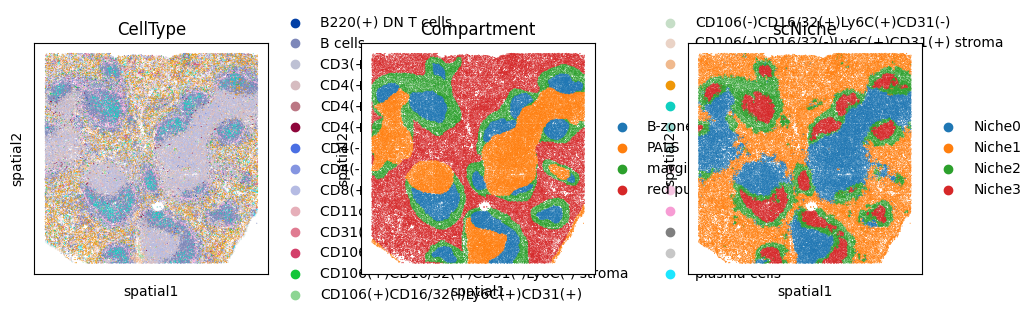

In [4]:
sc.pl.embedding(adata, basis="spatial", color=['CellType', 'Compartment', 'scNiche'],s=2, show=False, )

In [5]:
adjusted_rand_score(adata.obs['Compartment'], adata.obs['scNiche'])

0.63379170834581